### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.graph_objs import Layout
import plotly.io as pio
import plotly.offline as py
import matplotlib.pyplot as plt

### 2. Labels, colors and coordinates of nodes

In [2]:
node_label = [
              # SOURCING
              "Agricultor", #0
              "2 Mayores Harineras", #1
              "Dealers menores", #2
              "Dealers mayores", #3
              "Agricultores Ecologicos", #4
              "Harina Blanca e Integral", #5
              "Harinas Premium", #6
              # INBOUND
              "Obrador 1", #7
              "Obrador 2", #8
              "Obrador 3", #9
              # PRODUCCION
              "Mezclado", #10
              "Fermentado", #11
              "Amasado", #12
              "Formado", #13
              "Levado", #14
              "Horneado", #15
              # OUTBOUND
              "Pan en exposicion", #16
              "Pan en exposicion", #17
              "Pan en exposicion", #18
              # CLIENTES
              "Panaderia 1", #19
              "Panaderia 2", #20
              "Panaderia 3", #21
             ]

node_color = [
             # SOURCING
             "rgba(255, 153, 0, 0.6)","rgba(255, 153, 0, 0.6)","rgba(255, 153, 0, 0.6)","rgba(255, 153, 0, 0.6)","rgba(255, 153, 0, 0.6)","rgba(255, 153, 0, 0.6)","rgba(255, 153, 0, 0.6)",
             # INBOUND
             "purple","purple","purple",
             # PRODUCCION
             "rgba(255, 0, 0, 0.6)","rgba(255, 0, 0, 0.6)","rgba(255, 0, 0, 0.6)","rgba(255, 0, 0, 0.6)","rgba(255, 0, 0, 0.6)","rgba(255, 0, 0, 0.6)",
             # OUTBOUND
             "green","green","green",
             # CLIENTES
             "darkgreen","darkgreen","darkgreen",
             ]

flow_color = ["rgba(18, 187, 101, 0.3)"]*23

nodx = [
         # SOURCING
         0,# "Agricultor", #0
         0.13,# "2 Mayores Harineras", #1
         0,# "Dealers menores", #2
         0.13,# "Dealers mayores", #3
         0,# "Agricultores Ecologicos", #4
         0.2,# "Harina Blanca e Integral", #5
         0.2,# "Harinas Premium", #6
         # INBOUND
         0.32,# "Obrador 1", #7
         0.4,# "Obrador 2", #8
         0.4,# "Obrador 3", #9
         # PRODUCCION
         0.48,# "Mezclado", #10
         0.53,# "Fermentado", #11
         0.58,# "Amasado", #12
         0.63,# "Formado", #13
         0.68,# "Levado", #14
         0.74,# "Horneado", #15
         # OUTBOUND
         0.86,# "Pan en exposicion", #16
         0.86,# "Pan en exposicion", #17
         0.86,# "Pan en exposicion", #18
         # CLIENTES
         1.01,# "Panaderia 1", #19
         1.01,# "Panaderia 2", #20
         1.01,# "Panaderia 3", #21
        ]

nody = [
         # SOURCING
         0.5,# "Agricultor", #0
         0.5,# "2 Mayores Harineras", #1
         0.3,# "Dealers menores", #2
         0.9,# "Dealers mayores", #3
         0.7,# "Agricultores Ecologicos", #4
         0.35,# "Harina Blanca e Integral", #5
         0.2,# "Harinas Premium", #6
         # INBOUND
         0.5,# "Obrador 1", #7
         0.5,# "Obrador 2", #8
         0.5,# "Obrador 3", #9
         # PRODUCCION
         0.4,# "Mezclado", #10
         0.7,# "Fermentado", #11
         0.4,# "Amasado", #12
         0.7,# "Formado", #13
         0.4,# "Levado", #14
         0.5,# "Horneado", #15
         # OUTBOUND
         0.3,# "Pan en exposicion", #16
         0.4,# "Pan en exposicion", #17
         0.5,# "Pan en exposicion", #18
         # CLIENTES
         0.2,# "Panaderia 1", #19
         0.3,# "Panaderia 2", #20
         0.4,# "Panaderia 3", #21
        ]

### 3. Sankey chart illustrating a bakery's supply chain

In [3]:
images = [      
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/truck.png", 
                  x= 0.06, y= 0.07, sizex=0.15 , sizey=0.15, xref='paper', yref='paper'),
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/truck.png", 
                  x= 0.04, y= 0.48, sizex=0.15 , sizey=0.15, xref='paper', yref='paper'),
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/truck.png", 
                  x= 0.06, y= 0.85, sizex=0.15 , sizey=0.15, xref='paper', yref='paper'),
      
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/spain.jpg",
                  x= -0.06, y= 0.98, sizex=0.08 , sizey=0.08 , xref='paper', yref='paper'),
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/harina.png", 
                  x= -0.06, y= 0.92, sizex=0.1 , sizey=0.1, xref='paper', yref='paper'),          
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/increase2.png",
                  x= 0.014, y= 0.9, sizex=0.07 , sizey=0.07 , xref='paper', yref='paper'),        
        
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/france.jpg",
                  x= -0.06, y= 0.16, sizex=0.075 , sizey=0.075, xref='paper', yref='paper'),
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/ukraine.jpg",
                  x= -0.06, y= 0, sizex=0.08 , sizey=0.08 , xref='paper', yref='paper'),
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/harina.png", 
                  x= -0.06, y= 0.09, sizex=0.1 , sizey=0.1, xref='paper', yref='paper'),        
        
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/warning.png",
                  x= 0.005, y= 0.03, sizex=0.08 , sizey=0.08 , xref='paper', yref='paper'),   
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/warning.png",
                  x= 0.12, y= 0.15, sizex=0.08 , sizey=0.08 , xref='paper', yref='paper'), 
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/inc_price3.png",
                  x= 0.21, y= 0.38, sizex=0.09 , sizey=0.09 , xref='paper', yref='paper'), 
        
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/spain.jpg",
                  x= -0.06, y= 0.535, sizex=0.08 , sizey=0.08 , xref='paper', yref='paper'), 
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/harina.png", 
                  x= -0.06, y= 0.475, sizex=0.1 , sizey=0.1, xref='paper', yref='paper'), 

        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/solicitud.png",
                  x= -0.02, y= -0.08, sizex=0.35 , sizey=0.35, xref='paper', yref='paper'),
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/almacen.png",
                  x= 0.3, y= 0.88, sizex=0.1 , sizey=0.1 , xref='paper', yref='paper'),        
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/eyehand.png",
                  x= 0.34, y= 0.58, sizex=0.12 , sizey=0.12 , xref='paper', yref='paper'), 
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/furgo.png",
                  x= 0.32, y= 0.36, sizex=0.08 , sizey=0.08 , xref='paper', yref='paper'),
        
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/push_.png",
                  x= 0.4, y= -0.06, sizex=0.35 , sizey=0.35 , xref='paper', yref='paper'),

        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/mezcladoras.png",
                  x= 0.46, y= 1.02, sizex=0.16 , sizey=0.16 , xref='paper', yref='paper'),  
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/fermentadora.png",
                  x= 0.5, y= 0.22, sizex=0.15 , sizey=0.15 , xref='paper', yref='paper'),
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/amasadora.png",
                  x= 0.55, y= 1.02, sizex=0.15 , sizey=0.15 , xref='paper', yref='paper'),   
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/formadora.png",
                  x= 0.6, y= 0.22, sizex=0.15 , sizey=0.15 , xref='paper', yref='paper'),  
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/horno.png",
                  x= 0.7, y= 0.94, sizex=0.15 , sizey=0.15 , xref='paper', yref='paper'), 
        
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/pan.png",
                  x= 0.82, y= 0.1, sizex=0.12 , sizey=0.12 , xref='paper', yref='paper'),  
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/pan.png",
                  x= 0.82, y= 0.3, sizex=0.12 , sizey=0.12 , xref='paper', yref='paper'),
        dict(source= "https://raw.githubusercontent.com/sebagrasso/Sankey-Chart/main/imgs/pan.png",
                  x= 0.82, y= 0.74, sizex=0.12 , sizey=0.12 , xref='paper', yref='paper'),          
    ]

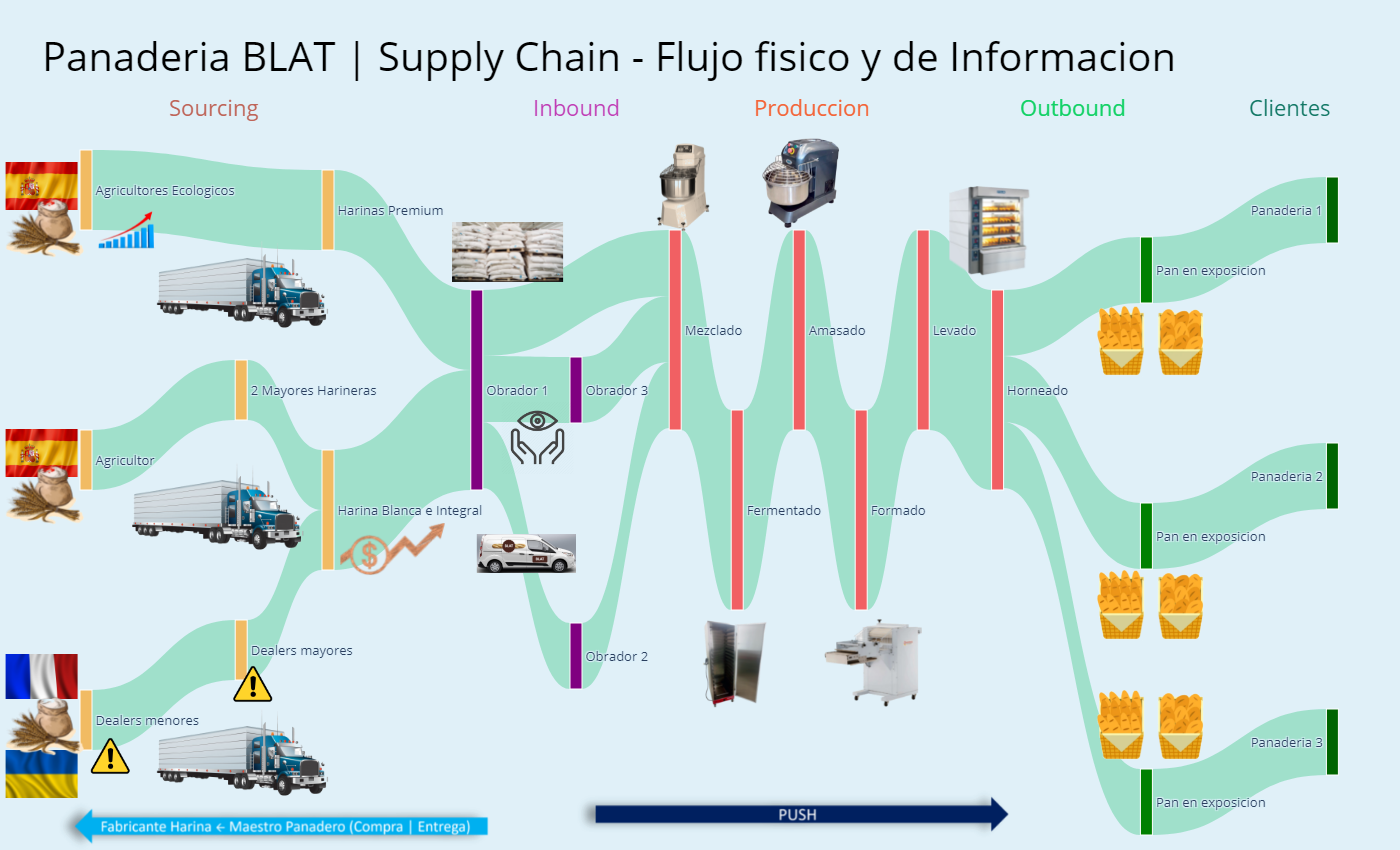

In [4]:
source =     [0,  1,  2,  3,  4,  5,  6,  7,  7,  7,  8,  9,  10,  11,  12,  13,  14,  15, 15, 15 , 16, 17, 18]
target =     [1,  5,  3,  5,  6,  7,  7,  10,  8,  9, 10, 10, 11,  12,  13,  14,  15,  16, 17, 18 , 19, 20, 21]
flow_value = [30, 30, 30, 30, 40, 60, 40, 33, 33, 33, 33, 33, 100, 100, 100, 100, 100, 33, 33, 33 , 33, 33, 33]
fontannot = 22
yannot = 1.1

layout = Layout(
    # title = dict(text="Panadería BLAT | Supply Chain - Flujo físico y de Información", x=0.03, y=0.95),
    title = dict(text="Panaderia BLAT | Supply Chain - Flujo fisico y de Informacion", x=0.03, y=0.95),    
    titlefont = dict(size=40, color='black'),
    margin=dict(t=150, b=100),
    autosize=True,
    images= images,
    annotations=[
        dict(text='Sourcing', x= 0.07, y=yannot, xref='paper', yref='paper', showarrow=False, font=dict(size=fontannot, color ="rgba(191, 100, 88, 1)")),
        dict(text='Inbound', x=0.4, y=yannot, xref='paper', yref='paper', showarrow=False, font=dict(size=fontannot, color ="rgba(192, 60, 181, 1)")),
        dict(text='Produccion', x=0.59, y=yannot, xref='paper', yref='paper', showarrow=False, font=dict(size=fontannot, color ="rgba(244, 100, 56, 1)")),
        dict(text='Outbound', x=0.845, y=yannot, xref='paper', yref='paper', showarrow=False, font=dict(size=fontannot, color ="rgba(18, 210, 101, 1)")),
        dict(text='Clientes', x=1.01, y=yannot, xref='paper', yref='paper', showarrow=False, font=dict(size=fontannot, color ="rgba(18, 120, 101, 1)"))
    ]
)

fig = go.Figure(
    data=[go.Sankey(
        arrangement='snap',
        node = dict(
          pad = 200,
          thickness = 12,
          line = dict(color = "white", width = 1),
          label = node_label,
          color = node_color,
          x=nodx,
          y=list(map(lambda x: x-0.1, nody)),
        ),
        link = dict(
          source = source,
          target = target,
          value = flow_value,
          color = flow_color
        )
        )], layout = layout)

fig.update_layout(height=850, width = 1400, font_size=23,
                 font=dict(size = 13,),
                 paper_bgcolor='rgba(221, 240, 249, 0.9)',
                 # paper_bgcolor='rgba(221, 240, 249, 0)',
                 )
# fig.show()
fig.show("png")
# py.plot(fig,filename="flow_chart_supplyChain.html", auto_open = False)
# pio.write_image(fig, "flow_chart_supplyChain.png")